# Trabalho de Ciência dos Dados


** Nome:** Abel Cavalcante de Andrade Neto

## Introdução

Visando compreender a interação do IDH com fatores como o nível de fertilidade e o número de idosos de um país, foi feito o questionamento:
*Como o nível de fertilidade e a porcentagem de idosos se relacionam com o IDH de um país?*

## Análises e explicação dos resultados

### Importações e leituras

O programa importa as bibliotecas necessárias para essa análise, além de ler os arquivos em questão:

In [94]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

idh = pd.read_excel('Indicator_HDI.xlsx')
fertility = pd.read_excel('indicator undata total_fertility.xlsx')
seniors = pd.read_excel('population_aged_60plus_years_both_sexes_percent.xlsx')

### Filtrando o Ano

Devido à limitações dos próprios dados, o ano escolhido foi o de 2005:

In [95]:
idh_5 = idh.loc[:, ["HDI", 2005]]
fert_5 = fertility.loc[:, ["Total fertility rate", 2005]]
seni_5 = seniors.loc[:, ["geo", 2005]]

### Conversão de Índice

Aqui, definimos o que servirá como índice em cada uma das tabelas:

In [96]:
idh_index = idh_5.set_index('HDI')
fert_index = fert_5.set_index('Total fertility rate')
seni_index = seni_5.set_index('geo')

### Remoção dos Países sem dados

Removemos, por meio do comando *.dropna()*, os países que não possuem dados:

In [97]:
idh_nan = idh_index.dropna()
fert_nan = fert_index.dropna()
seni_nan = seni_index.dropna()

### Junção

Assim, juntamos todos os dados em uma única tabela:

In [98]:
idh_fert = idh_nan.join(fert_nan, how="inner", lsuffix="_IDH", rsuffix="_Fertility")
everything = idh_fert.join(seni_nan, how="inner")
everything.columns = ['2005_IDH', '2005_Fertility Rate', '2005_Amount of Elderly (%)']

everything.head()

,2005_IDH,2005_Fertility Rate,2005_Amount of Elderly (%)
Afghanistan,0.340,6.93,3.62
Albania,0.721,1.92,12.30
Algeria,0.667,2.51,7.04
Angola,0.445,6.66,3.71
Argentina,0.765,2.29,13.80


E ordenamos baseando-se no IDH:

In [99]:
everything.sort_values('2005_IDH', inplace = True)

everything.head()

,2005_IDH,2005_Fertility Rate,2005_Amount of Elderly (%)
"Congo, Dem. Rep.",0.260,6.73,4.73
Niger,0.265,7.62,4.06
Burundi,0.267,6.73,4.21
Mozambique,0.285,5.67,4.83
Liberia,0.300,5.46,4.90


## Gráficos

Assim, podemos representar esses dados por meio de gráficos, para facilitar a visualização:

Começando com a Quantidade de Idosos:

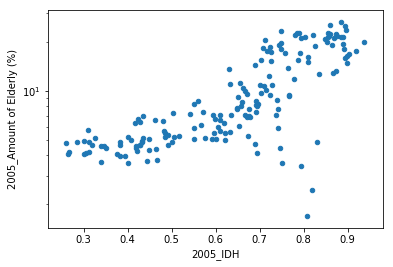

In [100]:
everything.plot.scatter(x='2005_IDH',y='2005_Amount of Elderly (%)', logy=True)

Fazemos a correlação:

In [101]:
everything['2005_IDH'].corr(everything['2005_Amount of Elderly (%)'])

0.7483393477685291

E adicionamos uma reta ao gráfico

In [102]:
def reta_am(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='blue', alpha=0.8)
    plt.title('IDH vesrsus Amount of Elderly (2005)')
    plt.xlabel('IDH')
    plt.ylabel('Amount of Elderly (%)')
    
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
    plt.tight_layout()
    plt.show()
    
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

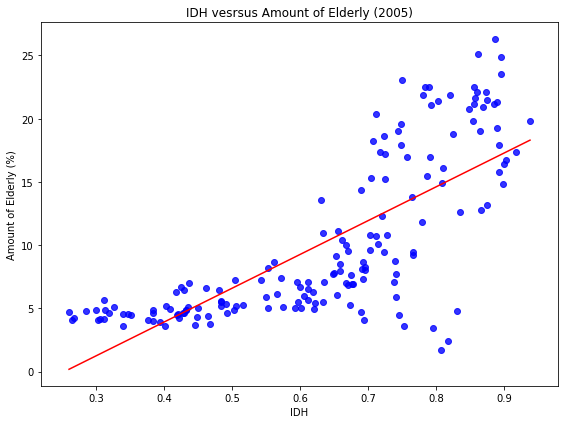

Coeficiente linear: -6.76333389305708
Coeficiente angular: 26.724546035656715


In [103]:
reta_am(everything['2005_IDH'], everything['2005_Amount of Elderly (%)'])

Repetindo, assim, o mesmo processo para os dados de Fertilidade:

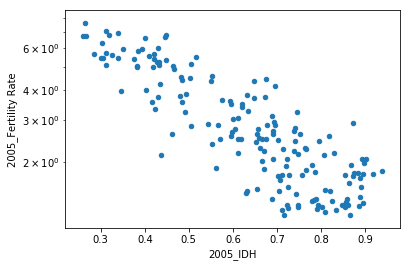

In [104]:
everything.plot.scatter(x='2005_IDH', y='2005_Fertility Rate', logy=True)

In [105]:
everything['2005_IDH'].corr(everything['2005_Fertility Rate'])

-0.8634699642595323

In [106]:
def reta_fer(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
    
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='blue', alpha=0.8)
    plt.title('IDH vesrsus Fertility (2005)')
    plt.xlabel('IDH')
    plt.ylabel('Fertility')
     
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='red')
 
    plt.tight_layout()
    plt.show()
    
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

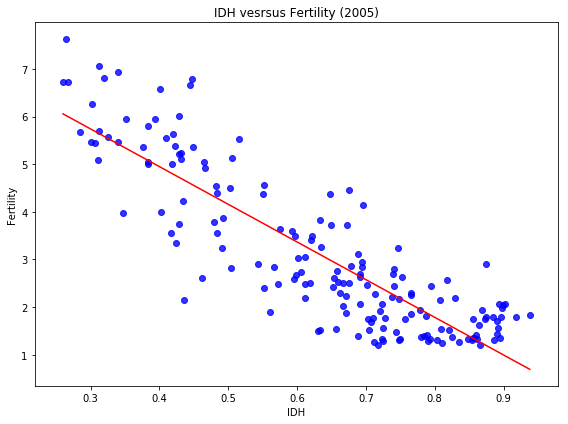

Coeficiente linear: 8.112727128619099
Coeficiente angular: -7.90895983867094


In [107]:
reta_fer(everything['2005_IDH'], everything['2005_Fertility Rate'])

## Conclusão

Com esses dados, foi possível observar uma clara relação entre o IDH e os parâmetros observados: A Fertilidade possui uma relação inversda clara quanto ao IDH, sendo que quanto maior o IDH, maior o nível de fertilidade, o que pode estar relacionado a diversos fatores, como, por exemplo, o aumento do custo de vida.

A relação do IDH com a quantidade de idosos também se mostra bastante clara, podendo muito bem ser relacionada com o aumento da qualidade de vida e o avanço da medicina atual, além de mudanças na própria estrutura social para comportar melhor essa faixa etária, como reformas na previdência. Todavia, é possivel observar que alguns países se desviam desse padrão.

Se filtrarmos os sete países com IDH maior que 0.7 e agrupá-los a partir do número crescente da porcentagem de idosos, podemos ver quais são os países que apresentam esse comportamento anômalo:

In [108]:
everything[everything['2005_IDH'] > 0.7].sort_values("2005_Amount of Elderly (%)").head()

,2005_IDH,2005_Fertility Rate,2005_Amount of Elderly (%)
United Arab Emirates,0.807,2.15,1.69
Qatar,0.818,2.56,2.46
Bahrain,0.795,2.45,3.44
Kuwait,0.752,2.63,3.60
Saudi Arabia,0.746,3.23,4.45


Boa parte dos países que apresentam essa anomalia estão presentes no Oriente Médio, um lugar onde a faixa etária que prevalece é a de jovens e adultos, sendo assim podendo ser levantado dois pontos importantes. O primeiro se trata da grande economia do local, que, incentivada pelo petróleo e turismo, foi impulsionada fortemente e é uma das maiores do mundo. Outro fator se diz quantro às guerras que perduram por lá, podendo assim afetar fortemente a balança etária.

## Expandindo a observação

Nós vimos como esses dados se relacionam no ano de 2005, mas será que isso perdura em outros anos?

In [109]:
# Ano de 2000
idh_0 = idh.loc[:, ["HDI", 2000]]
fert_0 = fertility.loc[:, ["Total fertility rate", 2000]]
seni_0 = seniors.loc[:, ["geo", 2000]]

idh_0.set_index('HDI', inplace = True)
fert_0.set_index('Total fertility rate', inplace = True)
seni_0.set_index('geo', inplace = True)

idh_0.dropna(inplace = True)
fert_0.dropna(inplace = True)
seni_0.dropna(inplace = True)

idh_fert_0 = idh_0.join(fert_0, how="inner", lsuffix="_IDH", rsuffix="_Fertility")
junction_2000 = idh_fert_0.join(seni_0, how="inner", lsuffix="_IDH", rsuffix="_Elderly")
junction_2000.columns = ['2000_IDH', '2000_Fertility Rate', '2000_Amount of Elderly (%)']

# Ano de 1990
idh_90 = idh.loc[:, ["HDI", 1990]]
fert_90 = fertility.loc[:, ["Total fertility rate", 1990]]
seni_90 = seniors.loc[:, ["geo", 1990]]

idh_90.set_index('HDI', inplace = True)
fert_90.set_index('Total fertility rate', inplace = True)
seni_90.set_index('geo', inplace = True)

idh_90.dropna(inplace = True)
fert_90.dropna(inplace = True)
seni_90.dropna(inplace = True)

idh_fert_90 = idh_90.join(fert_90, how="inner", lsuffix="_IDH", rsuffix="_Fertility")
junction_1990 = idh_fert_90.join(seni_90, how="inner", lsuffix="_IDH", rsuffix="_Elderly")
junction_1990.columns = ['1990_IDH', '1990_Fertility Rate', '1990_Amount of Elderly (%)']

# Ano de 1980
idh_80 = idh.loc[:, ["HDI", 1980]]
fert_80 = fertility.loc[:, ["Total fertility rate", 1980]]
seni_80 = seniors.loc[:, ["geo", 1980]]

idh_80.set_index('HDI', inplace = True)
fert_80.set_index('Total fertility rate', inplace = True)
seni_80.set_index('geo', inplace = True)

idh_80.dropna(inplace = True)
fert_80.dropna(inplace = True)
seni_80.dropna(inplace = True)

idh_fert_80 = idh_80.join(fert_80, how="inner", lsuffix="_IDH", rsuffix="_Fertility")
junction_1980 = idh_fert_80.join(seni_80, how="inner", lsuffix="_IDH", rsuffix="_Elderly")
junction_1980.columns = ['1980_IDH', '1980_Fertility Rate', '1980_Amount of Elderly (%)']


Primeiro plotamos os gráficos de Fertilidade, além de conferirmos a correlação de cada um:

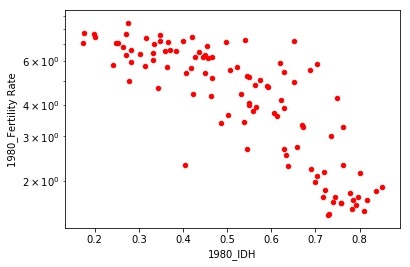

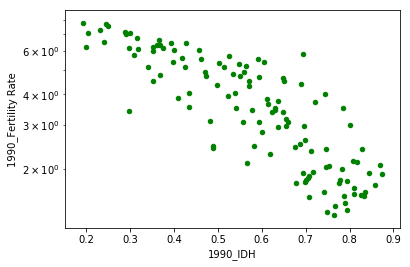

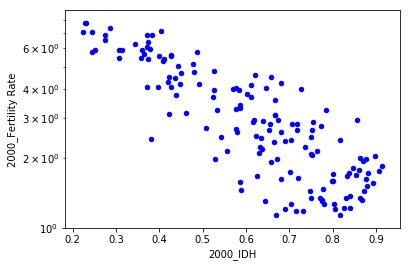

In [110]:

junction_1980.plot.scatter(x='1980_IDH', y='1980_Fertility Rate', logy=True, color = 'red') and junction_1990.plot.scatter(x='1990_IDH', y='1990_Fertility Rate', logy=True, color = 'green') and junction_2000.plot.scatter(x='2000_IDH', y='2000_Fertility Rate', logy=True, color = 'blue')

In [114]:
junction_1980['1980_IDH'].corr(junction_1980['1980_Fertility Rate'])

-0.8332621606362982

In [113]:
junction_1990['1990_IDH'].corr(junction_1990['1990_Fertility Rate'])

-0.8632672598450151

In [112]:
junction_2000['2000_IDH'].corr(junction_2000['2000_Fertility Rate'])

-0.865652149221969

Podemos, assim, ver uma clara tendência nos dados de anos anteriores observando a correlação dos dados, que permanece em torno de 0,8.

Por fim, repetimos o mesmo procedimento para os dados da quantidade de idosos:

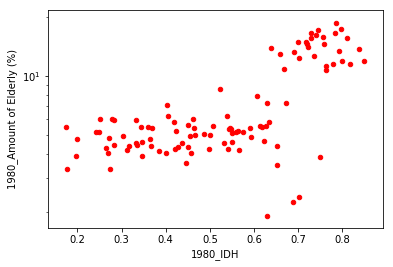

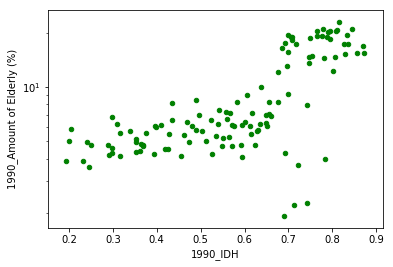

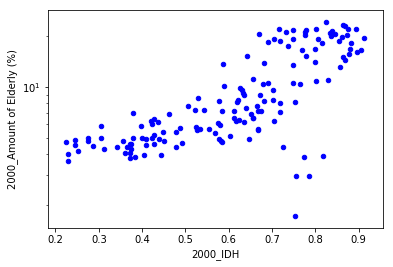

In [115]:
junction_1980.plot.scatter(x='1980_IDH', y='1980_Amount of Elderly (%)', logy=True, color = 'red') and junction_1990.plot.scatter(x='1990_IDH', y='1990_Amount of Elderly (%)', logy=True, color = 'green') and junction_2000.plot.scatter(x='2000_IDH', y='2000_Amount of Elderly (%)', logy=True, color = 'blue')

In [116]:
junction_1980['1980_IDH'].corr(junction_1980['1980_Amount of Elderly (%)'])

0.6932167515014339

In [117]:
junction_1990['1990_IDH'].corr(junction_1990['1990_Amount of Elderly (%)'])

0.7094020575733223

In [118]:
junction_2000['2000_IDH'].corr(junction_2000['2000_Amount of Elderly (%)'])

0.7309875303959193

Assim, podemos observar que, além de correlacionados, os dados ainda apresentam uma tendência de aumentar sua relação a cada ano que passa.

Por fim, é possivel observar que o IDH possui uma relação direta tando com a taxa de fertilidade quanto com o número de idosos de um país. Nesse, ambos apresentam uma relação direta, sendo que o numero de idosos aumenta conforme aumenta o IDH. Já naquele, o IDH apresenta uma relação inversa, sendo que o nível de fertilidade de um país diminui quando seu IDH cresce.